<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" width=160px align="left" />

## [課程講義下載](http://lccn.io/TR0q2B)

### <font color=red>進入技術分析的第一步-K線圖
----
    在世界投資史上公認的或者說第一位系統性的寫出技術分析的就是日本創奇米商巨賈本間宗久。在目前所有的技術分析中，國外的國內的，騙人的不騙人的所有技術分析中，公認的技術分析鼻祖就是K線圖(在日本稱之為蠟燭圖)

原文網址：https://kknews.cc/finance/3nq42ng.html

### <span style="color:red ">K線圖的畫法
----
   K線是由 4 個價格： 「開盤價、收盤價、最高價、最低價」所組成
    
   一條K線記錄的就是某一種股票一天的價格變動範圍。
   *   開盤價：就是一支股票在上午 9:00 整，股票市場開始交易時的價格。
   *   收盤價：就是一支股票在下午 1:30 整，股票市場結束交易時的價格。

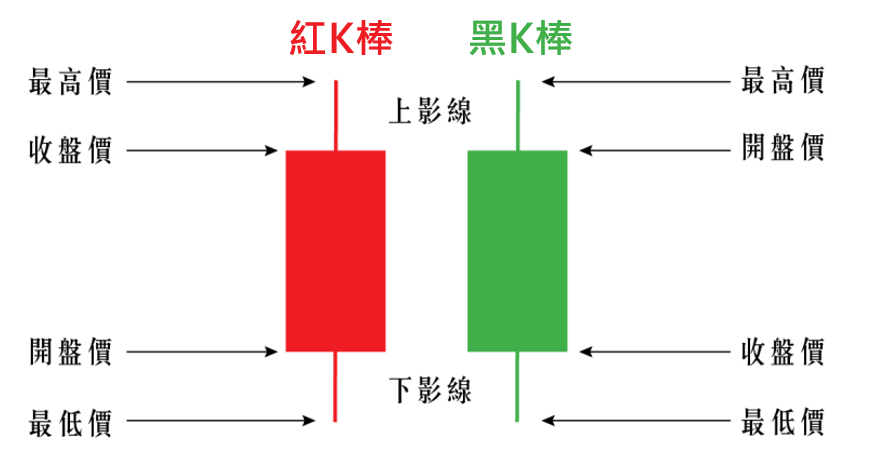

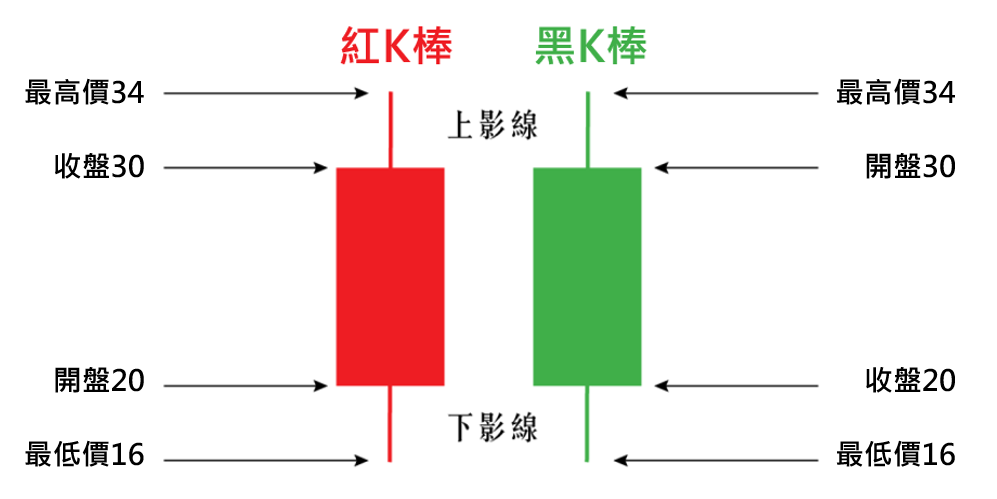

### <span style="color:red "> 你需要有從K棒想像股價走勢的能力
--------

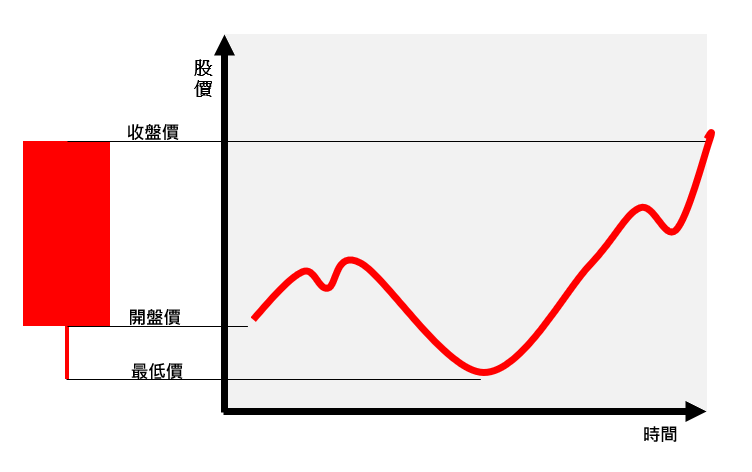

### <span style="color:red "><小測驗1>
------
###    你可以幫我想像一下下面這跟K棒的走勢狀況嗎？
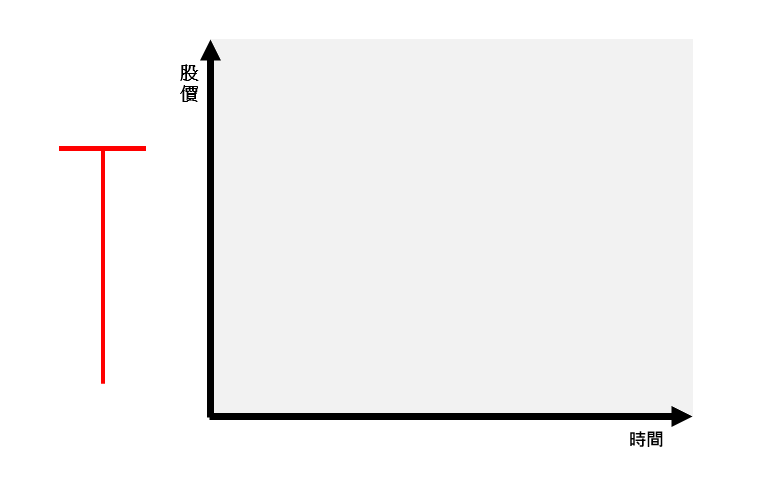
    

### <span style="color:red ">以下是我們需要的量化分析套件:
---    
    1. Jupyter Notebook環境中，第一次安裝過就好，以後直接導入模組就好。
    2. 如果你是在Colab的環境中運作檔案，請每次安裝

! pip install cufflinks

! pip install chart_studio

### <span style="color:red ">1.導入需求模組

In [1]:
import cufflinks as cf
cf.set_config_file(world_readable=True,theme='pearl',offline=True)

### <span style="color:red ">2.取得目標股票資料

In [2]:
import yfinance as yf

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#「YTD」 是「year to date」 的縮寫

prices = yf.download(
'2330.tw',
period = '6mo',
progress=False
)
prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-28,447.0,449.0,438.0,438.0,433.149780,34402652
2022-09-29,443.0,443.5,432.0,435.0,430.182983,41094780
2022-09-30,424.5,427.5,422.0,422.0,417.326935,48266800
2022-10-03,418.5,424.5,416.5,417.0,412.382294,36044395
2022-10-04,429.5,432.0,427.0,429.0,424.249420,40375000
...,...,...,...,...,...,...
2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987
2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246
2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240


### <span style="color:red ">如果你有一種特殊需求-你想要看週期K線

In [13]:
import pandas as pd
import yfinance as yf

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#「YTD」 是「year to date」 的縮寫

prices = yf.download(
'2330.tw',
period = '6mo',
progress=False
)

#調整周期
days=7

weekPrice=pd.DataFrame()
weekPrice['Open']=prices['Open'].rolling(days).agg(lambda rows: rows[0])
weekPrice['High']=prices['High'].rolling(days).max()
weekPrice['Low']=prices['Low'].rolling(days).min()
weekPrice['Close']=prices['Close'].rolling(days).agg(lambda rows: rows[-1])
weekPrice['Adj Close']=prices['Adj Close'].rolling(days).agg(lambda rows: rows[-1])
prices=weekPrice
prices

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-09-23,NaN,NaN,NaN,NaN,NaN
2022-09-26,NaN,NaN,NaN,NaN,NaN
2022-09-27,NaN,NaN,NaN,NaN,NaN
2022-09-28,NaN,NaN,NaN,NaN,NaN
2022-09-29,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-03-17,525.0,526.0,504.0,518.0,518.0
2023-03-20,515.0,518.0,504.0,512.0,512.0
2023-03-21,513.0,518.0,504.0,517.0,517.0


### <span style="color:red ">3.直接畫個K線圖囉!

In [16]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">4.不夠，要加量!-把成交量也畫上來!

In [7]:
qf.add_volume()
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">敢問，你有沒有覺得上面的圖怪怪的?
---    
### 成交量圖的紅黑顏色，怎麼跟上面K棒顏色兜不起來???

### <span style="color:red "><插句話>你有聽過『新手看價，老手看量』或是『量先價而行』?
-----
### [為什麼股市老手愛看量？從買賣雙方冷熱認識成交量原理 │夯翻鼠FQ47 股票價量](https://www.youtube.com/watch?v=7hTKPeCAla0&list=PLrZrfGLGySze4iKPvxQeEBwKIJ8j1uxC1&index=9)
    
    
### [九種價量關係](https://an9la16714.pixnet.net/blog/post/346987304)

# <span style="color:red "><看盤策略1>有了價量以後，我們要來聊聊什麼是均線？
-----
    
    移動平均線(Moving Average，MA)是由美國投資專家葛蘭威爾所創立，
    投資人都統稱它為：均線
    它代表在一段時間內所有人買入股票的平均成本，
    反映了股價在一定時期內的強弱和趨勢。

### <span style="color:red ">均線的計算方式
-----
    
     加總 N 天的收盤價再除以 N
     均線的概念是：這N天的投資人買進平均成本

     因此均線就會根據時間長短分成

     5日、10日、20日、60日、240日

     公式就是：
     加總 N 天的收盤價再除以 N 
     得到第 N 天的算術平均線數值。
-----

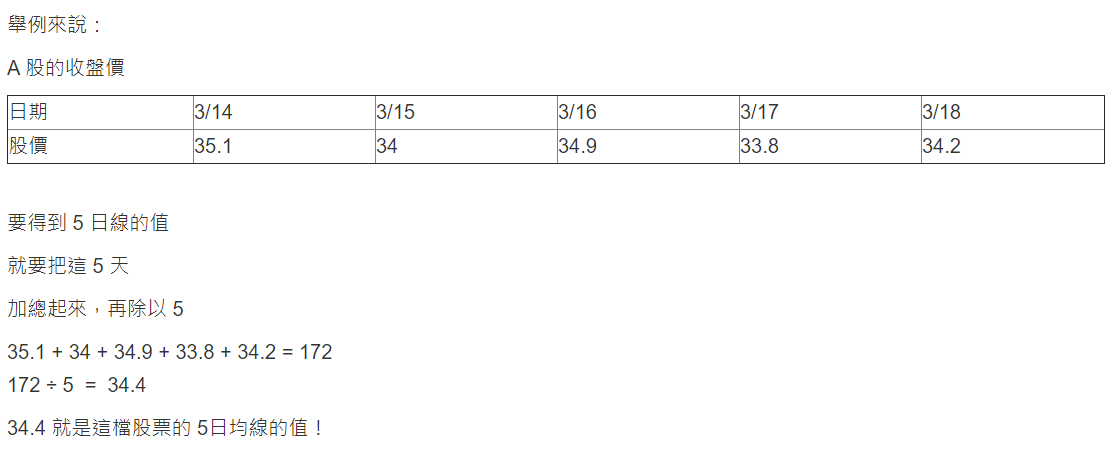

  ## [顏色選擇器](https://www.w3schools.com/colors/colors_picker.asp)

# <span style="color:red ">SMA

### <span style="color:red ">先來一條五日均線-SMA5
----
    過去 5 天收盤價的平均值，又稱為周線。
    是極短線的防守點(也就是說你買了沒幾天就想要賣了!!)，
    當連續漲停的股票，一但跌破周線，
    就是極短線出場的時機。
    
      5 - #008ae6
     20 - #ff6600
     60 - #7300e6
    240 - #009933
 ----


In [8]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [19]:
#str可以改名字
qf.add_sma(periods=5, column='Close', color='#66ff66',str='5日均線')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">再來一條20日均線-SMA20
----
    過去 20 天收盤價的平均值，又稱月線

In [10]:
qf.add_sma(periods=20, column='Close', color='#00ff00',str='20日均線')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">7.再來一條60日均線-SMA60
----
    過去 60 天收盤價的平均值，又稱季線，
    是中線的防守點。

In [11]:
qf.add_sma(periods=60, column='Close', color='#00b300')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">8.再來一條240日均線-SMA240
----
    過去 240 天收盤價的平均值，
    又稱年線，是長線的防守點。

In [12]:
qf.add_sma(periods=240, column='Close', color='#006600')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

## <span style="color:red ">有人會嫌SMA的計算方式，給大家的權重都一樣...=>所以出現了EMA
-----
    EMA是加權平均值，就是越近期的值越重視，越早期的值越輕視。這種設計方法，使得EMA更適合用於趨勢市場的交易。
## [如果你想要知道EMA怎麼算的...](http://alptbag.blogspot.com/2014/02/maema.html)

# <span style="color:red ">EMA-指數移動平均


In [21]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">先來一條5日EMA線
----

In [22]:
qf.add_ema(periods=5, column='Close', color='#ff1ac6',str='EMA 5日均線')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">再來一條12日EMA線
----

In [23]:
#桃紅色可以改
qf.add_ema(periods=12, column='Close', color='#ff99ff')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red ">再來一條26日EMA線
----

In [24]:
qf.add_ema(periods=26, column='Close', color='#ff00ff')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

# <span style="color:red "><看盤策略2>除了均線以外，第二種看盤的方式-MACD
   ## -Moving Average Convergnece & Divergence，中文稱為平滑異同移動平均線指標
    
## [參考連結](https://www.cmoney.tw/learn/course/technicals/topic/750)
-----
    
### 先找第一條線-DIF線(紅線，快線)
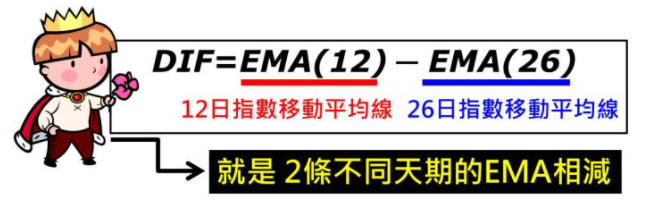
    


### 再找第二條線-MACD線(藍線，慢線)
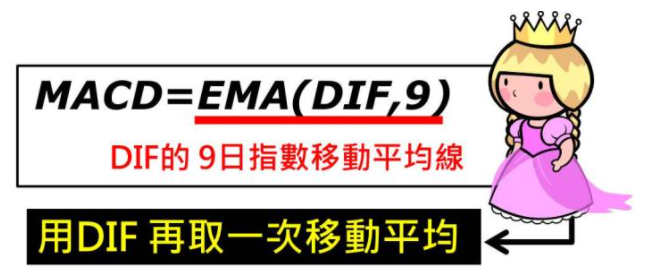


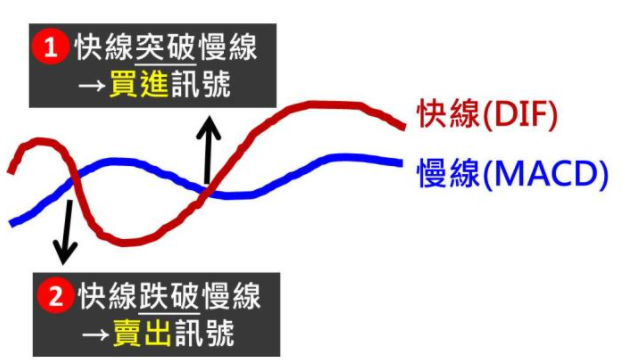

### <span style="color:red ">紅線是快線-短期，判斷股價趨勢的變化。
### <span style="color:blue ">藍線是慢線-長期，判斷股價大趨勢。

----
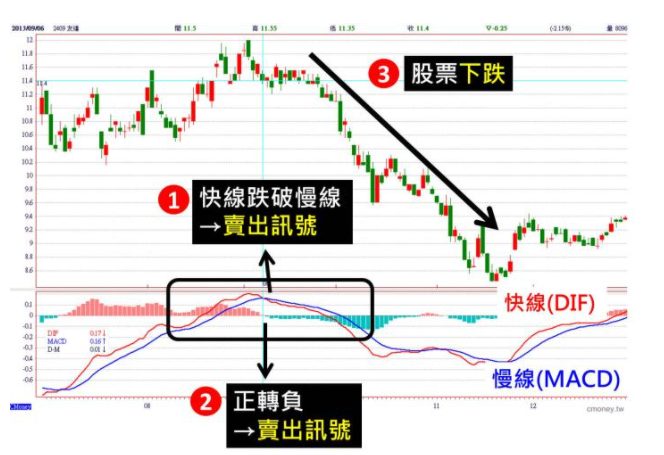

In [25]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [26]:
qf.add_macd(colors=['red','blue'])
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

# <span style="color:red "><看盤策略3>RSI(Relative Strength Index , RSI),又稱為相對強弱指標 
-----
    
  在1970年代， 
  威爾斯．威爾德(Wells Wider) 老先生一直在思考，  
  在買股票時，  
  到底怎麼樣才可以判斷買的力道比較強 或是 賣的力道比較強，  
  在研究多年後，他推出了一種指標... RSI指標
    


### 這是某支股票 過去一個禮拜股價變動的情況，
----
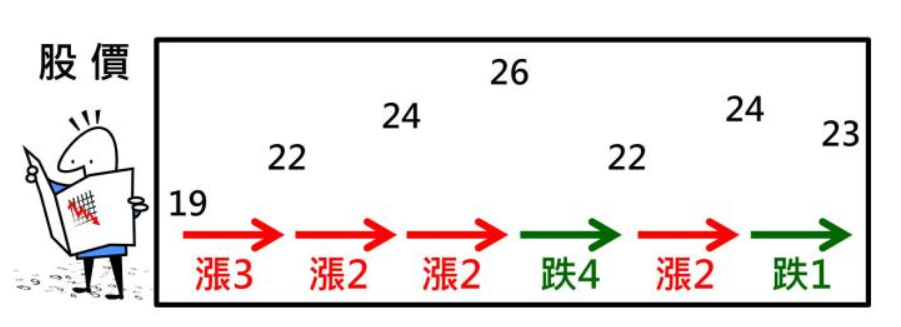

我們直接就這個簡單的例子來算最後一天的『7日RSI值』：  
因為是『7日』，所以我們回顧這六次漲跌情況，  
有四天是漲的，共漲了3+2+2+2= 9 ，平均下來每天漲 9 / 6= 1.5 (平均漲幅)  

有兩天是跌的，共跌了4+1= 5     ，平均下來每天跌5 / 6= 0.83 (平均跌幅)  

只要這樣子，RSI就可以算出來囉！  

在我們這個案例中，RSI= [1.5/(1.5+0.83) ]*100 = 64.3 (大於50喔！)，

----
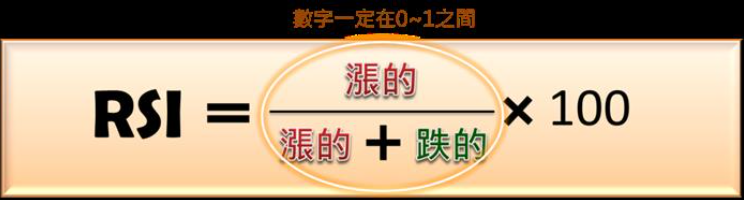

----
光看這個算式，我們就知道兩件事：

1. RSI的範圍一定在0-100之間。

2. RSI越大，代表過去『漲的比率』越大。(如果漲和跌的比率一樣，RSI會是中間值50)


透過RSI，也讓我們知道，

過去七天中漲的比例比較多。

# <span style="color:red ">RSI怎麼用? -RSI又被稱為『逆勢指標』，代表很多時候你要反著來！
-----
```
* RSI太大的時候(RSI > 80)
  就要小心是不是市場上大家太過一窩蜂，
  實際上已經是最後的榮景了。這時候你和股民共進退，
  可能會成為最後一批的犧牲者(買在最高點，然後開始大跌...)。 
 
* 當RSI太小的時候(RSI < 20)
  也代表市場上大家太過悲觀了，其實很多股票都被低估，
  這時候你若逢低買進，不僅成本比別人低，還能吃到大幅上漲的大波段!
    
```

In [5]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [6]:
#綠色的部分是可以改的
#period是指你現在要算幾日RSI值
qf.add_rsi(periods=5,rsi_upper=80, rsi_lower=20,colors='#ff6600')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [29]:
qf.add_rsi(periods=20,rsi_upper=80, rsi_lower=20,colors='#ff6600')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

# <span style="color:red ">RSI的交叉運作策略
-----
1.當『短週期的RSI』向上突破『長週期的RSI』，是黃金交叉
代表上漲力道夠，是買進的訊號，

一般稱為『黃金交叉』！

 

2.當『短週期的RSI』向下跌破『長週期的RSI』，是死亡交叉
代表下跌力道強，是賣出的訊號，

一般稱為『死亡交叉』！
    

In [30]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [59]:
#綠色的部分是可以改的
#periods裡面有兩個數字，20代表20天短周期，30代表30天長周期
qf.add_rsi(periods=[20,30],rsi_upper=80, rsi_lower=20,colors=['#ff6600','#0000e6'])
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

# <span style="color:red ">RSI的應用策略
----
最後幫大家整理一下，市場上最常使用的三種時機是：

1.RSI > 80時，為"超買"訊號，市場過熱，要準備開始跌了。

2.RSI < 20時，為"超賣"訊號，市場過冷，要準備開始漲了。

3.黃金交叉時可以買進；死亡交叉時可以賣出。

# <span style="color:red "><看盤策略4>布林通道(Bollinger Bands，BBands)
-----
    
  以 20MA 為中心 上下各2個標準差 為範圍的軌道操作方式  
  布林通道 又稱 布林格帶狀(Bollinger Bands，BBands) 或 保力加通道，  
  是由 約翰．布林格(John Bollinger) 所提出的概念。  
    
-----
  ### [參考連結](https://www.cmoney.tw/learn/course/technicals/topic/1216)


### <span style="color:red "><插句話>啥咪?你沒聽過標準差?
    
-----    
### [何謂標準差?](https://kknews.cc/zh-tw/news/yvpv5mj.html)

In [33]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [34]:
qf.add_bollinger_bands(periods=20, boll_std=2)
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

# <span style="color:red ">BBands的應用策略
----
最後幫大家整理一下，市場上最常使用的三種時機是：

1.當股價到低軌道時，進場做多。

2.股價觸碰到高軌道時出場。

------
   ### 在兩個標準差之中，依據上圖的常態分配，股價會超出軌道機率大約只有 0.046。

# <span style="color:red "><看盤策略5>DMI(Directional Movement Index)DMI趨向指標
-----
  ### [參考連結](https://www.thinkmarkets.com/tw/learn-to-trade/indicators-and-patterns/indicators/adx-indicator/)
-----
  ### 要算DMI，就要先聊ATR和DM兩個東西

### ATR指標-Average True Range的縮寫，其中文全稱是真實波動幅度均值
### 取下方三者的最大值
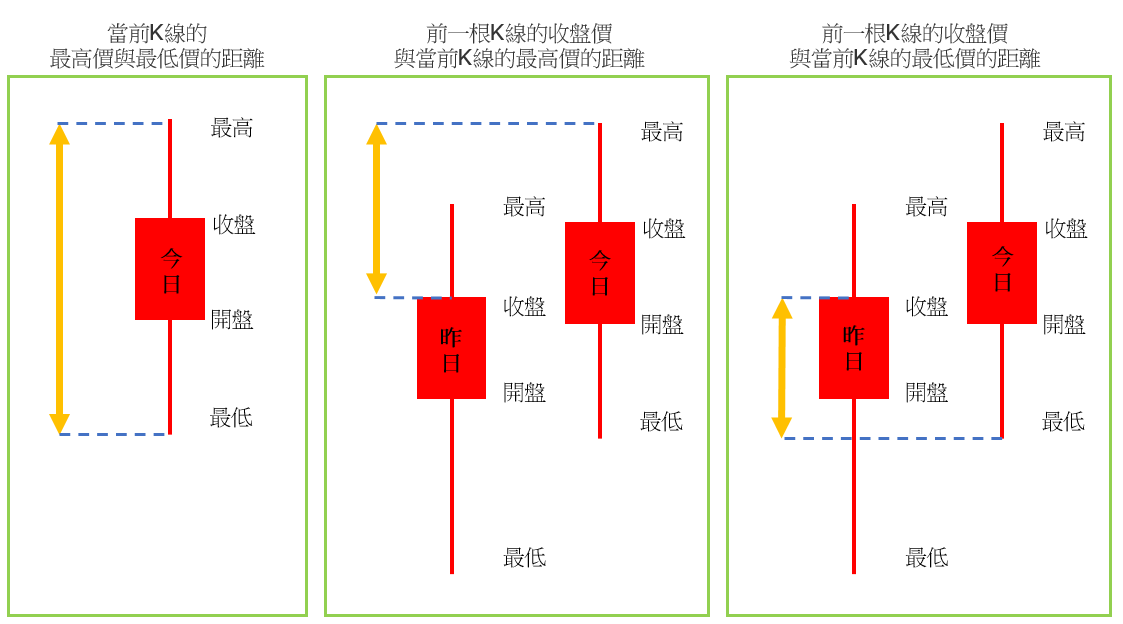

### DM指標-Directional Movement的縮寫，其中文全稱是動向變化值
### 分+DM(上升動向)和-DM(下降動向)
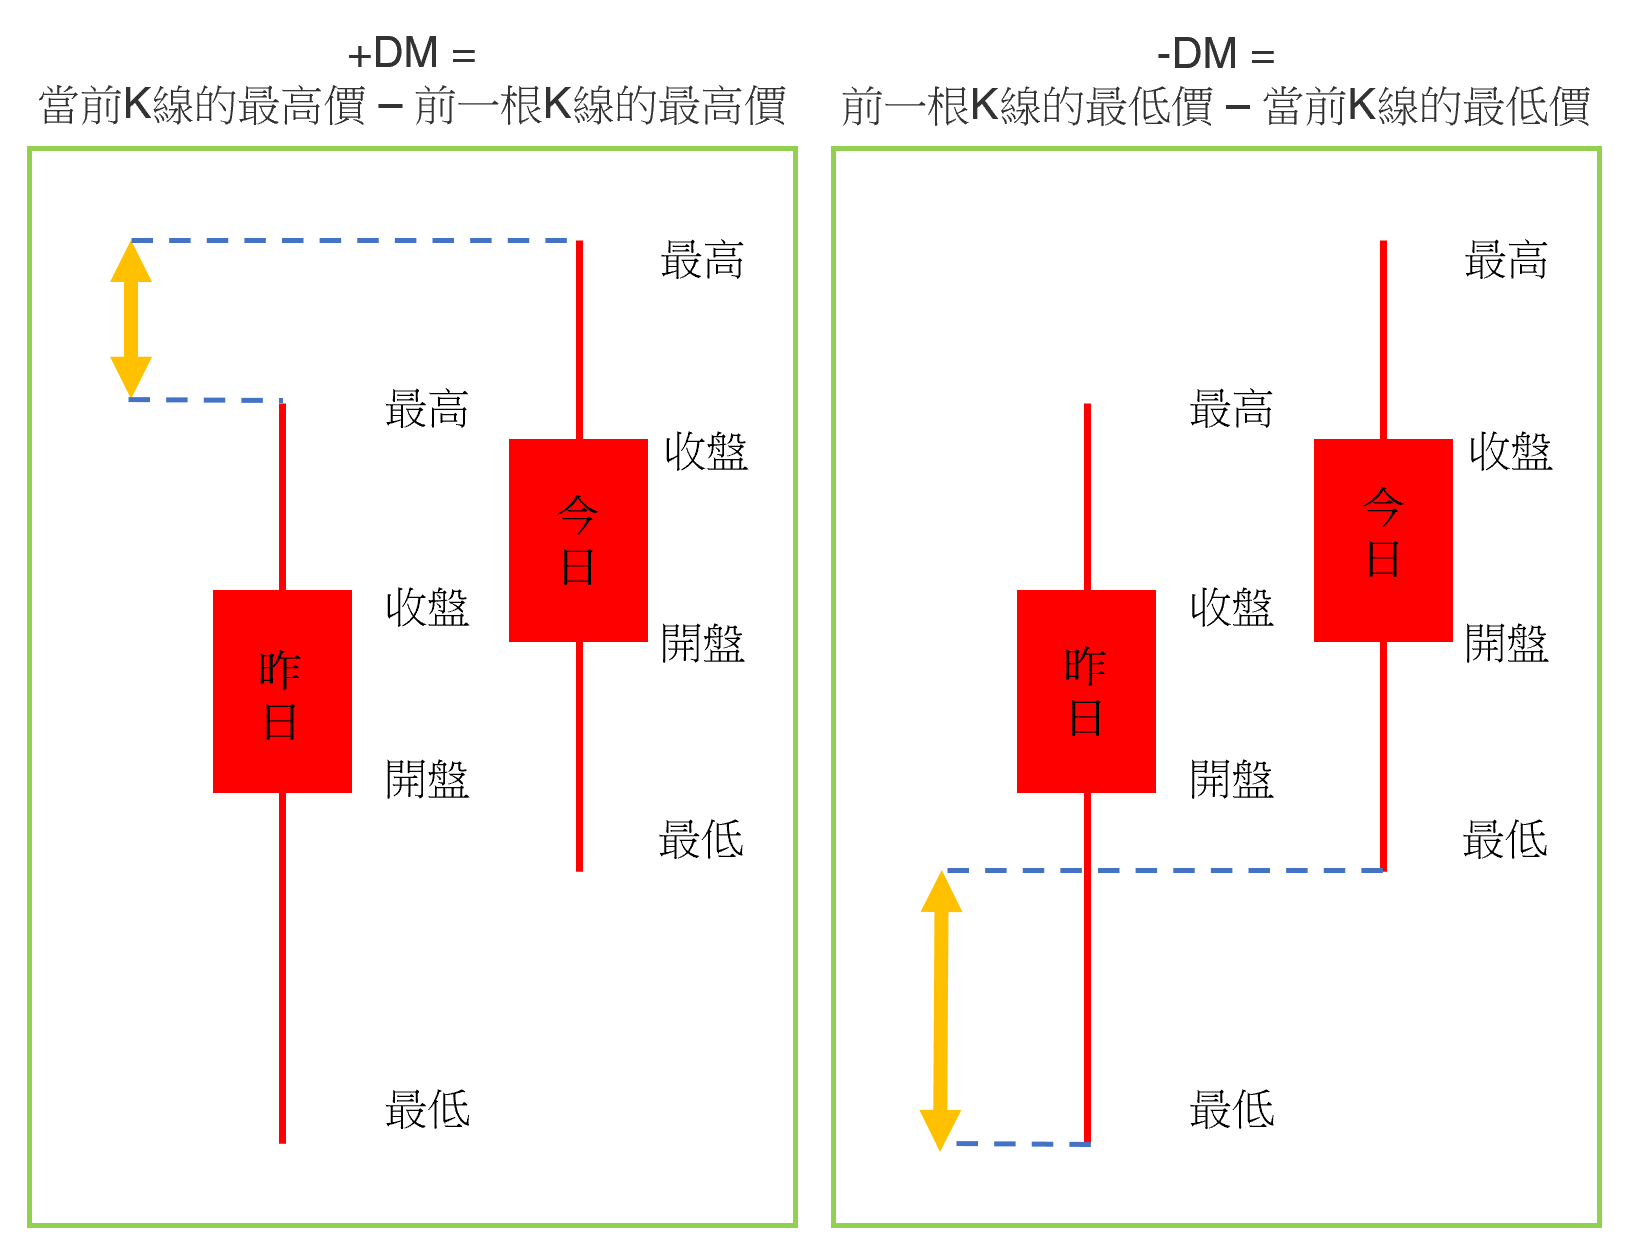

-----
## 無論是+DM還是-DM的值都必須大於等於0
## 若計算結果為負值，則將其值改為0。所以上圖的-DM就是0  
## DM值越大，代表市場的趨勢越強。

## DMI指標-Directional Movement Index的縮寫，其中文全稱是動向變化值
#### DMI指標由三條線構成：

---
1). +DI線  
    (設定周期的+ DM的平滑移動平均值 / 設定周期的ATR的平滑移動平均值) × 100  
    簡單的說就是看升值的部分，佔市場變動比率的份額

---
2). -DI線  
    (設定周期的- DM的平滑移動平均值 / 設定周期的ATR的平滑移動平均值) × 100    
    簡單的說就是看降值的部分，佔市場變動比率的份額
    
---
3). ADX線
    計算它之前首先要計算DX值（Directional movement index動向指數），其公式為：

DX值 = [(+DI 減去 -DI的絕對值) / (+DI 與 -DI的和)] × 100  
簡單的說就是看升降值的差額部分，到底比率高不高??
 
ADX值 = 設定周期內的DX值的平滑移動平均值

In [35]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

In [36]:
qf.add_dmi(periods=14)
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

# <span style="color:red ">DMI的應用策略
----
1). ADX線數值的應用 – 判斷趨勢強弱  

通常認為當ADX值低於25時，代表市場處於區間盤整中。ADX的值越高，市場的趨勢就越強。

2). +DI線和-DI線的交叉應用 – 確認入場買賣時機

當+DI線向上穿越-DI線時，是買進的交易信號；  
當+DI線向下穿越-DI線時，是賣出的交易信號。



### <span style="color:red "><小工具1>有時候，你可能只想關注某個價格帶...
    
-----    


In [7]:
#綠色是可以改的
#(250,410) 250是價格下限  410是價格上限
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.add_shapes(hspan=(450,500))
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red "><小工具2>有時候，因為分析的時間區段太長，所以你想要來條趨勢線...比較好比較
    
-----    


In [8]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
#趨勢線是兩個時間點的價格連線
#請確認時間點有在你的價格資訊裡面
qf.add_trendline('2022-10-19','2022-12-21',on='close',color='#ff4dff')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red "><小工具3>有時候，你想設定一個價格下限，做為最後出場通牒的指標...
    
-----    


In [9]:
qf = cf.QuantFig(prices, title="目標股票K線圖",legend='top', name='日K線圖')
qf.add_support(date='2022-10-19',color='#ff4dff')
qf.figure(up_color='#ff0000',down_color='#000000').iplot()

### <span style="color:red "><答案-小測驗1>
----
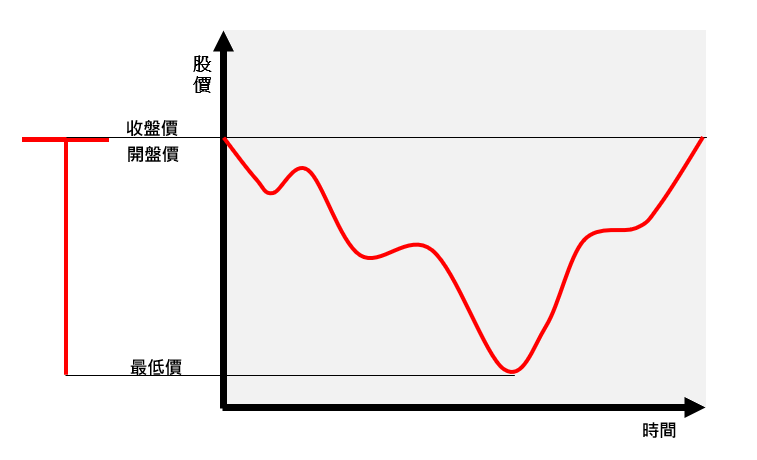